In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

### This is an approch to fitting unknown future data that is expected to follow a signature curve. In this example I used a squared log inside a power function. Finding an appropriate function will be one of the biggest challenges here. The function I used has an abs() to deal with negative logs, but that can seriously mess up the fit if it comes into play too much

### Another challenge is giving the fit_curve function the right starting parameters to guarantee a good fit. With the wrong starting parameters it can completely miss the fit or fail to find a fit. If everything is within a certain range, you can just set a,b,c to the average a,b,c for all products

 Base function: 3**(-0.5*(np.log(x/10))**2)


<function matplotlib.pyplot.show(close=None, block=None)>

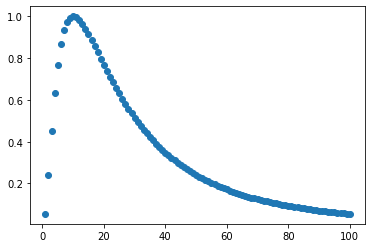

In [89]:
print(" Base function: 3*(-0.5*(log(x/10))^2)")
x = range(1,101)
y = []
for x_point in x:
    y.append(3**(-0.5*(np.log(x_point/10))**2))
pyplot.scatter(x, y)
plt.show

In [52]:
def make_movie(popularity,staying_power):
    x = range(1,101)
    y = []
    for x_point in x:
        y.append((3**(-.5*(np.log(x_point/(10*staying_power)))**2))*(8+3*random.random())*popularity)
    return (x,y)

y = (3^(-.5*(log((abs((x+-0.10000)/10.00000))+.01))^2))*1.00000


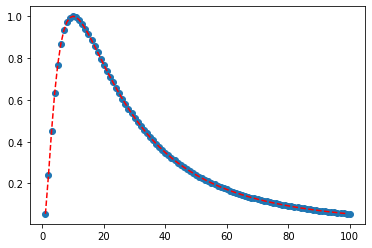

(-0.10000000000000016, -10.0, -1.0)

In [99]:
#The base function with a,b,c parameters
def objective(x, a, b, c):
    return (3**(-.5*(np.log((abs((x+a)/b))+.01))**2))*abs(c)


def fit_curve(x,y,p0=[-.5,-.5,-.5]):
    #p0 is the initial guess
    
    popt, _ = curve_fit(objective, x, y, maxfev=1000,p0=p0)
    # summarize the parameter values
    a, b, c = popt
    print('y = (3^(-.5*(log((abs((x+%.5f)/%.5f))+.01))^2))*%.5f' % (a, abs(b), abs(c)))
    # plot input vs output
    pyplot.scatter(x, y)
    # define a sequence of inputs between the smallest and largest known inputs
    x_line = arange(min(x), max(x), 1)
    # calculate the output for the range
    y_line = objective(x_line, a, b, c)
    # create a line plot for the mapping function
    pyplot.plot(x_line, y_line, '--', color='red')
    pyplot.show()
    return(a,b,c)
fit_curve(x,y)

Make a slightly below average movie
y = (3^(-.5*(log((abs((x+0.01727)/7.04888))+.01))^2))*6.62030


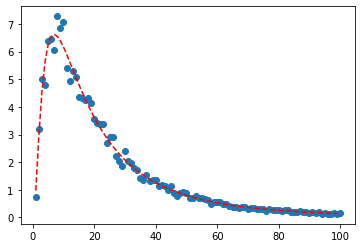

Make a really popular movie
y = (3^(-.5*(log((abs((x+0.22478)/20.26341))+.01))^2))*18.49502


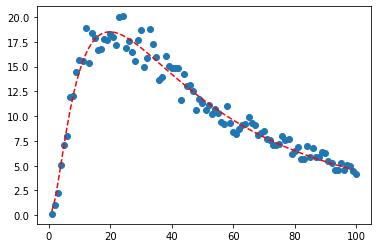

Make an unpopular but high staying-power movie
y = (3^(-.5*(log((abs((x+-1.11441)/47.36272))+.01))^2))*2.86538


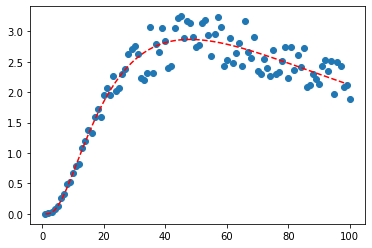

In [102]:
#array to store a,b,c values of all past data
all_movies_params = []

print("Make a slightly below average movie")
x,y = make_movie(.7,.7)
all_movies_params.append(list(fit_curve(x,y)))
print("Make a really popular movie")
x,y = make_movie(2,2)
all_movies_params.append(list(fit_curve(x,y)))
print("Make an unpopular but high staying-power movie")
x,y = make_movie(.3,5)
all_movies_params.append(list(fit_curve(x,y)))

print("\n Next, all the movies parameters are averaged to give the average movie")

Plot the average movie:


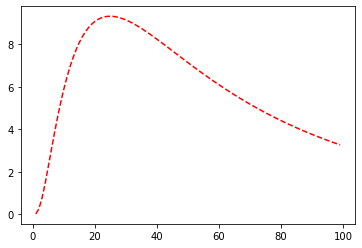

In [103]:
print("Plot the average movie:")

avg_a,avg_b,avg_c = np.mean(all_movies_params, axis=0)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, avg_a, avg_b, avg_c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Generate some starter points based on average movie:

y = (3^(-.5*(log((abs((x+-0.29079)/24.89167))+.01))^2))*9.32690


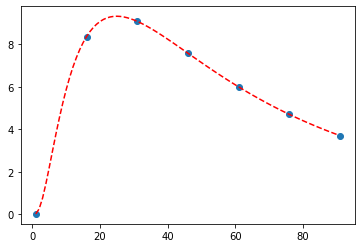

(-0.2907894136772396, -24.891667208904305, -9.326899795023293)

In [105]:
print("Generate some starter points based on average movie:\n")
average_x = range(1,101,15)
average_y = objective(average_x, avg_a, avg_b, avg_c)
fit_curve(average_x,average_y,p0=[avg_a,avg_b,avg_c])

Make a new movie with limited data:

Append the average movie to our movie to make a better fit:

Fit the new movie to the curve:

y = (3^(-.5*(log((abs((x+3.14037)/16.07067))+.01))^2))*12.54966


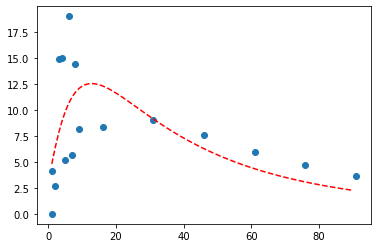

(3.1403651475169574, -16.070666632482048, -12.549659705901734)

In [117]:
print("Make a new movie with limited data:\n")
staying_power = .5
popularity = 2
x = list(range(1,10))
y = []
for x_point in x:
    y.append((3**(-.5*(np.log(x_point/(10*staying_power)))**2))*(2+8*random.random())*popularity)
    
print("Append the average movie to our movie to make a better fit:\n")
for i in range(len(average_x)):
    x.append(average_x[i])
    y.append(average_y[i])
    
print("Fit the new movie to the curve:\n")
fit_curve(x,y)

### You could also remove the x,y points from the average data that have alerady been covered by the range of real values